# KNN: K-Nearest Neighbors (K-vizinhos mais próximos)

### Objetivos dessa aula:
* apresentar o conceito do algoritmo de KNN
* explicar a diferença do KNN aplicado em problemas de regressão e classificação
* apresentar um caso prático de KNN
* prós e contras dessa abordagem



## Intuição
Se tivessemos que definir que animal esse ponto de interrogação representa, vocês diriam que é um cachorro ou um cavalo?

<img src="images/knn_intuição.png"  style="width: 700px" />

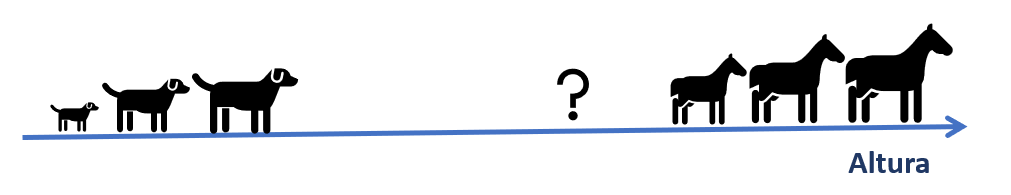

O KNN segue essa mesma lógica de encontrar quem são os k vizinhos mais próximos

### Funcionamento do KNN
<img src="images/algoritmo_passo_a_passo.png"  style="width: 700px" text="https://cambridgecoding.wordpress.com/" />
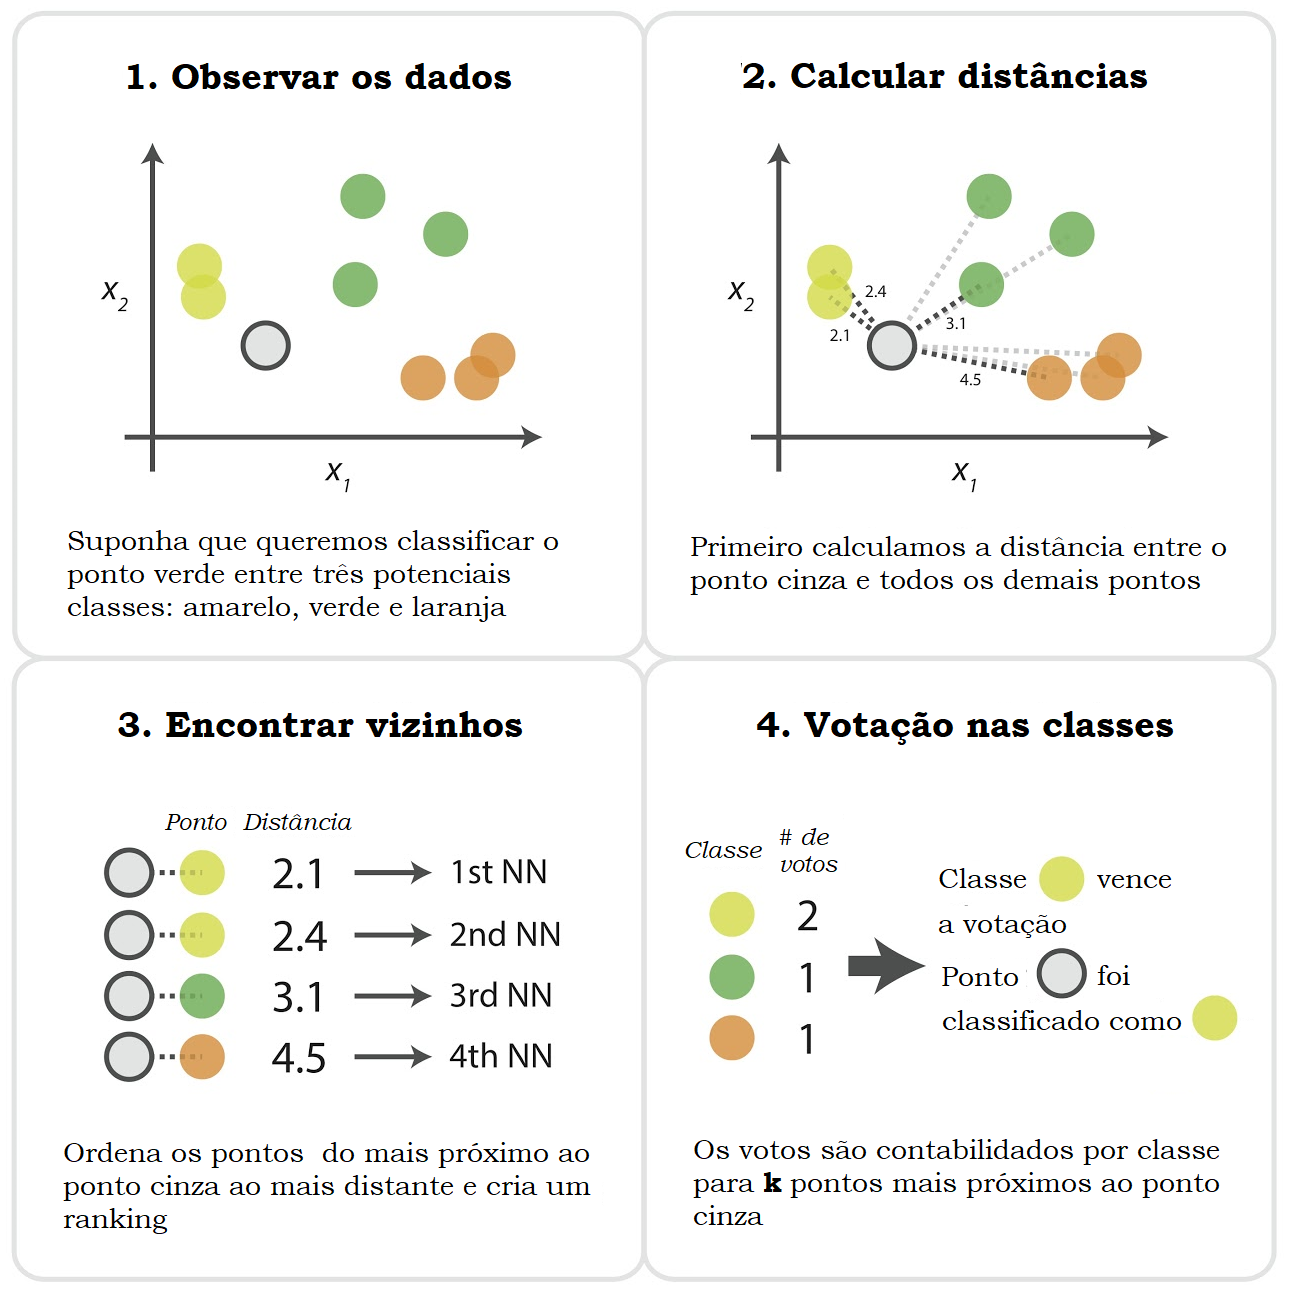

### Perguntas: 
1 - E se eu tivesse uma amostra nova, como faço para definir a que classe ela pertence? <br>
2 - O que aconteceria se tivéssemos 2 votos amarelos e 2 votos verdes? <br>
3 - O que aconteceria se tivéssemos 1 voto amarelo, 1 voto laranja e 1 voto verde? <br>
4 - Como é o treino e teste desse modelo? <br>
5 - O que aconteceria se eu tivesse muitos dados? <br>
6 - Como ficaria a votação em um problema de regressão?
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>

### Regressão em 1D

<img src="images\knn_regressão0.png" alt="Drawing" style="width: 500px;"/>
<img src="images\knn_regressão1.png" alt="Drawing" style="width: 500px;"/>
<img src="images\knn_regressão3.png" alt="Drawing" style="width: 500px;"/>
<img src="images\knn_regressão4.png" alt="Drawing" style="width: 500px;"/>
<img src="images\knn_regressão5.png" alt="Drawing" style="width: 500px;"/>
<img src="images/knn_regressão.png"  alt="Drawing"  style="width: 500px">


### 2D

<img src="images/knn_regressão_x_classificação.png"  style="width: 700px" text="https://realpython.com/knn-python/"/>

<br>



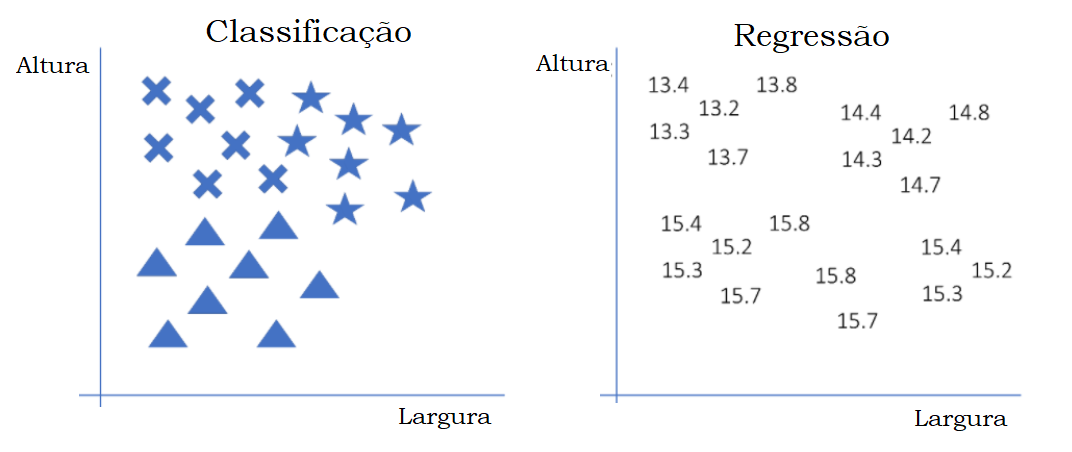

### Retomando <br>

KNN é um modelo baseado na **distância** entre os elementos pois ele parte da premissa que **observações similares** estarão **próximas** umas das outras enquanto **observações diferentes** estarão mais **distante**. 
<br>
<br>

Podemos calcular a distância entre dois pontos p e q usando a **distância Euclidiana**, definida como

$$ \begin{align} d(p,q)=\sqrt{\sum \limits _{i=1} ^n (p_i−q_i)^2} \end{align} $$
    
onde $p_i$ e $q_i$ representam o valor do atributo i para os pontos p e q e a soma é feita em todas as n dimensões (features).
<br>
<br>

Os passos realizados pelo algoritmo são: <br>
1 - Calcular a distância entre o ponto de interesse e os demais pontos <br>
2 - Rankear os pontos pela menor distância <br>
3 - Encontrar os k pontos/vizinhos mais próximos <br>
4 - Votar o label para o ponto a ser previsto ou realizar uma média entre os pontos <br>
<br>
Se em um problema de classificação tivermos n classes **evitar usar k múltiplo de n** para não termos empate de classes e **nem k pares**. Exemplo: em um problema como o mostrado acima com 3 classes, se usarmos k=3 podemos ter uma situação em que os três pontos mais próximos perteçam à classes diferentes
<br><br>
E como vimos podemos utilizá-lo tanto em um problema de **classificação** quanto **regressão**.



## Caso prático
Vamos aplicar o KNN em um caso prático e discutir outros pontos essenciais sobre o modelo.
<br>

#### Problema:
Queremos predizer se um usuário que clicou no nosso anúncio em uma rede social irá realizar uma compra. Nesse caso, temos um problema de classificação binário.
<br> <br>
Fonte dos dados: https://www.kaggle.com/rakeshrau/social-network-ads

#### Da aula anterior temos o passo a passo que queremos seguir:
- 0) Fazer todo o processo de limpeza e avaliação da base, EDA, etc., etc.


- 1) Importar a **classe do algoritmo que se deseja treinar**
        - Usaremos quase sempre a biblioteca [scikit-learn](https://scikit-learn.org/stable/)
    
  
- 2) Instanciar a classe do algoritmo, **escolhendo os hiperparâmetros desejados**
        - Para a primeira versão do modelo, pode ser uma boa escolha utilizar os parâmetros default;
        - Veremos mais pra frente como escolher os parâmetros adequadamente;
    
   
- 3) Separe os dados em **dados de treino** e **dados de teste**.
        - Em alguns casos, pode ser interessante criar também um conjunto de **dados de validação**
        - Para fazer a separação, usamos o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
    
- 4) Treine o modelo, usando **os dados de treino**


- 5) Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)


- 6) **Avalie a performance do modelo com base nas previsões acima**


- 7) Se necessário, reinicie o ciclo!


- 8) Quando o modelo estiver suficientemente bom, faça o **deploy**

In [7]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar o dataset
dataset = pd.read_csv('data/Social_Network_Ads.csv').drop('Gender', axis=1)
dataset.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


##### Metadados
*User ID:* identificador único do usuário (variável inteira positiva) <br>
*Gender:* gênero do usuário (variável binária string) <br>
*Age:* idade do usuário (variável inteira positiva) <br>
*Estimated Salary:* salário estimado da pessoa (variável inteira positiva) <br>
*Purchased:* indica se o usuário realizou ou não uma compra (booleana numérica)

### Data Analysis

In [8]:
# Encontre as estatísticas básicas do dataset
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Vamos fazer um rápido EDA utilizando a seaborn

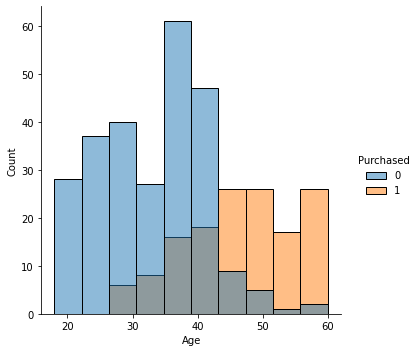

In [10]:
# Faça um displot da coluna Age utilizando Purchase nas cores
sns.displot(data=dataset, x="Age", hue='Purchased')

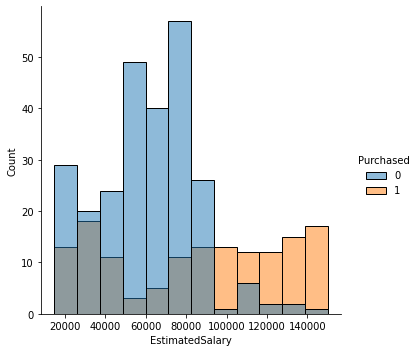

In [11]:
# Faça um displot da coluna EstimatedSalary utilizando Purchase nas cores
sns.displot(data=dataset, x="EstimatedSalary", hue="Purchased")

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

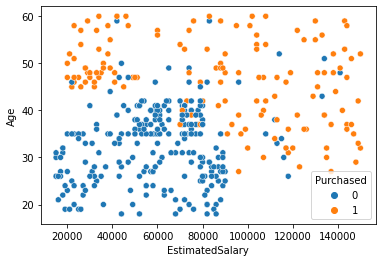

In [12]:
# Faça um scatterplot entre EstimatedSalary e Age utilizando Purchase nas cores
sns.scatterplot(data=dataset, x="EstimatedSalary", y="Age", hue="Purchased")

In [14]:
# Calcule a quantidade de amostra em cada classe
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [16]:
# Calcule a porcentagem de amostra em cada classe
dataset.Purchased.value_counts(normalize=True)*100

0    64.25
1    35.75
Name: Purchased, dtype: float64

O dataset está desbalanceado?

In [17]:
# Checar se temos nulos
dataset.isna().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
dataset.EstimatedSalary.sort_values()

92      15000
43      15000
155     15000
150     15000
32      16000
        ...  
168    148000
103    149000
240    149000
211    150000
7      150000
Name: EstimatedSalary, Length: 400, dtype: int64

<br>

### Processamento dos Dados

In [20]:
# Definir variável target
target = 'Purchased'

# Separar as variáveis independentes do target e eliminar o "User ID"
X = dataset.drop([target, 'User ID'], axis=1)       # Variáveis independentes (features)
y = dataset[[target]]                               # Variável dependente / target  


X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20,
                                                    random_state = 0,
                                                    stratify=y)

print("Tamanho do treino: ", X_train.shape)
print("Tamanho do teste: ", X_test.shape)

Tamanho do treino:  (320, 2)
Tamanho do teste:  (80, 2)


#### Pré-processamento:
Como nossos dados tem escalas muito diferentes (Estimated Salary é da ordem de 1000x maior que o Age) e o KNN depende da distância, nós temos que normalizar nossos dados. <br> <br>
LEMBRETE:  a normalização NUNCA deve acontecer ANTES da separação em treino e teste. Essa é uma das formas mais comuns de vazamento de informação [data leakage](https://machinelearningmastery.com/data-preparation-without-data-leakage/)).

##### Normalização

Dentro do sklearn.preprocessing temos:

1. MinMaxScale <br>
2. StandardScale <br>
3. RobustScaler

In [22]:
# Importa scaler
from sklearn.preprocessing import MinMaxScaler

# Instancia scaler
sc = MinMaxScaler()

# Faz o fit_transform dos dados de treino
# sc.fit(X_train)
# X_train = sc.transform(X_train)

X_train = sc.fit_transform(X_train)

# E aplica o scaler nos dados de teste
X_test = sc.transform(X_test)

In [23]:
X_train

array([[0.4047619 , 0.31851852],
       [0.26190476, 0.20740741],
       [0.73809524, 0.0962963 ],
       [0.38095238, 0.20740741],
       [0.71428571, 0.88148148],
       [0.47619048, 0.71851852],
       [0.26190476, 0.0962963 ],
       [0.14285714, 0.08888889],
       [0.5       , 0.41481481],
       [0.42857143, 0.27407407],
       [0.14285714, 0.05925926],
       [0.        , 0.52592593],
       [0.85714286, 0.40740741],
       [0.42857143, 0.28888889],
       [0.80952381, 0.91111111],
       [0.76190476, 0.21481481],
       [0.30952381, 0.54814815],
       [0.78571429, 0.05925926],
       [0.52380952, 0.42222222],
       [0.30952381, 0.41481481],
       [0.30952381, 0.        ],
       [0.04761905, 0.4962963 ],
       [0.95238095, 0.23703704],
       [0.97619048, 0.2       ],
       [0.69047619, 0.72592593],
       [0.92857143, 0.33333333],
       [0.52380952, 0.68148148],
       [0.28571429, 0.48148148],
       [0.64285714, 0.08148148],
       [0.26190476, 0.34074074],
       [0.

### Treino do modelo e previsão
[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [42]:
# Importar o modelo
from sklearn.neighbors import KNeighborsClassifier

# Instancia o modelo considerando 3 vizinhos mais próximos e distância euclidiana (p=2)
clf = KNeighborsClassifier(n_neighbors=3, p=2)
clf


KNeighborsClassifier(n_neighbors=3)

In [29]:
type(y_train)

pandas.core.frame.DataFrame

In [43]:
# Realiza o fit do modelo passando o X_train e y_train
clf.fit(X_train, y_train)

/home/patricia/Documentos/escritorio_dados/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [44]:
# Utiliza o modelo treinado para predizer no dataset de teste
y_pred = clf.predict(X_test)

In [45]:
y_pred_train = clf.predict(X_train)

In [47]:
y_pred_train

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [48]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [49]:
clf.predict_proba(X_test)

array([[0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

In [50]:
# parâmetros do modelo
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

#### Avaliação do modelo utilizando matriz de confusão
[Documentação ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html?highlight=confusionmatrixdisplay)  <br>
[Documentação Acurracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy%20score#sklearn.metrics.accuracy_score)

In [51]:
y_pred_train

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,

Acurácia do teste: 80.0%
Acurácia do treino: 90.0%


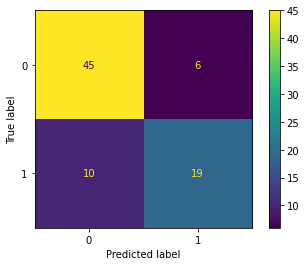

In [52]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Calcular a acurácia utilizando o accuracy_score
ac = accuracy_score(y_test, y_pred)
ac_train = accuracy_score(y_train, y_pred_train)

print(f"Acurácia do teste: {ac:.1%}")
print(f"Acurácia do treino: {ac_train:.1%}")

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

Com Cross Validation:

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20,
                                                    random_state = 0,
                                                    stratify=y)

print("Tamanho do treino: ", X_train.shape)
print("Tamanho do teste: ", X_test.shape)


# Instancia o StratifiedKFold com suffle
folds = StratifiedKFold(5, shuffle=True, random_state=42)

# Instancia o modelo considerando 3 vizinhos mais próximos e distância euclidiana
k=3
clf = KNeighborsClassifier(n_neighbors=k, 
                           p=2)

def train_model(X, y, folds, model, metric):
    train_scores=[]
    val_scores=[]

    # Checar se é um numpy array
    if not isinstance(y, np.ndarray):
        y = np.array(y).ravel()
    if not isinstance(X, np.ndarray):
        X = np.array(X)
    

    for n_fold, (train_index, valid_index) in enumerate(folds.split(X, y)):
        # Selecionar dados de treino e validação
        X_train, X_val = X[train_index], X[valid_index]
        y_train, y_val = y[train_index], y[valid_index]

        # print qual é o valor do min max tanto do treino quanto da validação
        print("Split: ", n_fold)
        print(f"TREINO valor MIN {X_train.min()}  MAX {X_train.max()}")
        print(f"VAL valor MIN {X_val.min()}  MAX {X_val.max()}")

        # Instancia o scale
        sc = MinMaxScaler()

        # Scale dos dados no treino
        X_train = sc.fit_transform(X_train)

        # Scale dos dados na validação
        X_val = sc.transform(X_val)

        # Fit nos dados de treino
        model.fit(X_train, y_train)

        # Prediz nos dados de treino
        y_pred_train = model.predict(X_train)

        # Prediz nos dados de validação
        y_pred_val = model.predict(X_val)

        # Salva a métrica
        train_scores.append(metric(y_train, y_pred_train))
        val_scores.append(metric(y_val, y_pred_val))

        

    print('CV mean train score: {0:.4f}, std: {1:.4f}.'.format(np.mean(train_scores), np.std(train_scores)))
    print('CV mean validation score: {0:.4f}, std: {1:.4f}.'.format(np.mean(val_scores), np.std(val_scores)))
    return train_scores, val_scores


train_scores, val_scores = train_model(X_train, y_train, folds, clf, accuracy_score)

Tamanho do treino:  (320, 2)
Tamanho do teste:  (80, 2)
Split:  0
TREINO valor MIN 18  MAX 150000
VAL valor MIN 18  MAX 146000
Split:  1
TREINO valor MIN 18  MAX 149000
VAL valor MIN 18  MAX 150000
Split:  2
TREINO valor MIN 18  MAX 150000
VAL valor MIN 18  MAX 147000
Split:  3
TREINO valor MIN 18  MAX 150000
VAL valor MIN 19  MAX 149000
Split:  4
TREINO valor MIN 18  MAX 150000
VAL valor MIN 18  MAX 138000
CV mean train score: 0.9273, std: 0.0077.
CV mean validation score: 0.9094, std: 0.0230.


Acurácia do teste: 80.0%<br>
Acurácia do treino: 90.0% <br>

In [36]:
train_scores

[0.92578125, 0.92578125, 0.92578125, 0.94140625, 0.91796875]

In [37]:
val_scores

[0.921875, 0.921875, 0.9375, 0.875, 0.890625]

#### Está pronto nosso primeiro KNN. Ele servirá como baseline de comparação para as melhorias.

## Medidas de distância

<img src="images/9_distance_metrics.png" width="600px" text="https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa">

### Distância euclidiana
$$ D(x,y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}$$
__Vantagens:__
- Muito fácil de entender e aplicar
- É a menor distância entre dois pontos em um plano cartesiano
- Tem resultados muito bons em dados com baixa dimensionalidade e quando a magnitude do vetor é importante

__Desvantagens:__
- Não é invariante à escala
- Quanto maior a dimensionalidade dos seus dados, menos útil é essa distância (Maldição da Dimensionalidade)
- Não é recomendada quando o dataset possui atributos discretos e/ou binários

### Distância de Manhattan 
$$ D(x,y) = \sum_{i=1}^{n}{|x_i - y_i|}$$
__Vantagens:__
- Utilizada quando podemos apenas se mover em ângulos de 90º como em um tabuleiro de xadrez ou uma cidade. Nesse caso, não há movimentação na diagonal
- Não sofre com a maldição da dimensionalidade
- Quando o dataset possui atributos discretos e/ou binários

__Desvantagens:__
- É menos intuitiva, principalmente em grandes dimensões
- Fornece distâncias maiores que a Euclidiana (não necessariamente ruim)

### Distância de Minkowski
$$ D(x,y) = \begin{pmatrix}\sum_{i=1}^{n}{|x_i - y_i|^p}\end{pmatrix}^{1/p}$$

- p=1 — Distância de Manhattan
- p=2 — Distância euclidiana
- p=∞ — Distância de Chebyshev

<img src="images/distance.jpg" width="600px" text="https://iq.opengenus.org/euclidean-vs-manhattan-vs-chebyshev-distance/">

## Maldição da Dimensionalidade
<img src="images/The-effect-of-the-curse-of-dimensionality-when-projected-in-1-one-dimension-2-two.png" width="600px" text="www.researchgate.net/figure/The-effect-of-the-curse-of-dimensionality-when-projected-in-1-one-dimension-2-two_fig3_342638066">

<img src="images/maldição.png" width="600px" text="https://iq.opengenus.org/euclidean-vs-manhattan-vs-chebyshev-distance/Elements of Statistical Learnings. You can freely and legally download a .pdf here http://www-stat.stanford.edu/~tibs/ElemStatLearn/">

## Melhorias:
* Definir o melhor valor para K

<img src="https://images.squarespace-cdn.com/content/v1/5d782753c70af105c29a9b14/1580261947016-XODPUVKWPGGMJJMAXSNF/Screen+Shot+2020-01-28+at+8.38.55+PM.png?format=1500w" width=600>

<img src="https://nickmccullum.com/images/python-machine-learning/introduction-k-nearest-neighbors/k-value-error-rates.png" width=600>

* Definir qual melhor métrica de distância
* Considerar pesos maiores para pontos mais próximos
* Considerar pesos maiores para features mais importantes
* Balancear classes
* Escolher uma métrica melhor para avaliar datasets desbalanceados

## Principais pontos do KNN:
* É um algoritmo supervisionado, ou seja, precisa de uma variável de target <br>
* É um algoritmo preguiçoso (lazy) pois realiza todos os cálculos na fase de teste. <br>

#### Prós 

1 – Aplicável tanto para problemas de classificação (target são classes) quanto de regressão (target contínuo) <br>
2 – É um dos mais simples algoritmos a se implementar.  <br>
3 – Modelos mais complexos, como uma rede neural, necessitam de uma quantidade maior de dados para serem treinados que o KNN. <br>
4 – Poucos paramêtros para tunning (Valor de K, Medida de Distância e peso nas distâncias) <br>
5 – O tempo de treinamento é utilizado para "memorizar" os dados. Ele armazena os dados na RAM. Por isso ele possui um dos fit mais rápidos. <br>
7 – Facilmente interpretável <br>
8 – É um Algoritmo de Aprendizagem Não Linear, ou seja, não utiliza linhas e hiperplanos para separar os dados <br>
9 – Pode ser aplicado em casos que temos pouca quantidade de dados <br>
10 – Outliers no treino tem pouco efeito (já que muito provavelmente não serão escolhidos entre os vizinhos mais próximos), mas podem ser um problema se são os pontos em que você quer predizer.


#### Contras

1 – Demora excessiva na fase de teste e alto consumo de memória para realizar esta atividade, uma vez que ele armazena todo dataset em memória. (KDtrees e BallTrees)<br>
2 – KNN não é indicado a dados de grandes dimensões, devido à demora em calcular a distância de todos os pontos de dados entre si. <br>
3 – Como ele depende de medidas de distância é importante se atentar a escala dos valores utilizados. <br>
4 – Classes muito desbalanceadas fazem com que a classe majoritária domine na votação (tem mais dessa classe na hora de realizar a contagem dos k-vizinhos) ~ podemos amenizar esse problema adicionando um peso baseado na distância.<br>
5 – A precisão do algoritmo k-NN pode ser severamente degradada pela presença de
features com ruído ou irrelevantes ~ seleção de features e redução da dimensionalidade


### Bibliografia
- https://www.slideshare.net/jorisschelfaut/knn-154482179 <br>
- https://www.kaggle.com/rakeshrau/social-network-ads <br>
- https://realpython.com/knn-python/ <br>
- https://cambridgecoding.wordpress.com/
- https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html



### Material de Aprofundamento
- [KD-Tree](https://www.youtube.com/watch?v=Glp7THUpGow) <br>
- [Maldição da dimensionalidade](https://www.youtube.com/watch?v=DyxQUHz4jWg) <br>
- [KNN and High Dimensional Data](https://www.baeldung.com/cs/k-nearest-neighbors)
- [Medidas de distância](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)
- [Why is Euclidean distance not a good metric in high dimensions?](https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions)
- [k-Nearest Neighbors (kNN) for anomaly detection](https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13)
- [Mahalanobis Distance](https://blogs.sas.com/content/iml/2012/02/15/what-is-mahalanobis-distance.html)
- [Elements of Statistical Learnings. You can freely and legally download a .pdf here](http://www-stat.stanford.edu/~tibs/ElemStatLearn/)
- [Nearest Neighbor Algorithms](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms)
- [Artigo: Effects of Distance Measure Choice on KNN Classifier Performance - A Review](https://arxiv.org/pdf/1708.04321.pdf)
- (https://www.datasklr.com/select-classification-methods/k-nearest-neighbors)

## Exercícios
Utilize o dataset `breast_cancer.csv` e o KNN para criar e comparar diferentes modelos variando tanto a quantidade de vizinhos quanto a métrica de distância. <br>
Comece com um modelo baseline sem tratar os dados, discuta em grupo quais melhorias nos dados devem ser feitas e teste! =)
<br>
<br>
Recomendação: façam os exercícios em um novo notebook. Ao longo do curso iremos implementar melhorias e comparações com outros modelos. E separando em um novo notebook fica mais fácil de salvar no git como portfólio ou postar no linkedin.

In [ ]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
